In [154]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(42)

# K-Means

Implement support functions

In [155]:
def choice_centroids(X, K):
    # Randomly choose K centroids (K rows) from the dataset X
    return X[np.random.choice((X.shape[0]), K, replace=False)]

def kmeans_assign_label(X, centroids):
    D = cdist(X, centroids, 'euclidean')
    return np.argmin(D, axis=1)

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # Select all points assigned to the k-th centroid
        X_k = X[labels == k, :]
        # Compute the mean of these points
        centroids[k, :] = np.mean(X_k, axis=0) 

    return centroids

def has_converged(centroids, new_centroids):
    # Check if the centroids have changed
    return set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids])

Implement main function

In [156]:
def kmeans(X, K):
    centroids = choice_centroids(X, K)
    labels = np.zeros(X.shape[0])
    it = 0
    while True:
        labels = kmeans_assign_label(X, centroids)
        new_centroids = kmeans_update_centroids(X, labels, K)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
        it += 1
    return labels, centroids, it

Display

In [157]:
def kmeans_display(X, label, centroids):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'ro', markersize=4, alpha=0.8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=4, alpha=0.8)
    plt.plot(X2[:, 0], X2[:, 1], 'bo',markersize=4, alpha=0.8)

    plt.plot(centroids[:, 0], centroids[:, 1], 'yo', color='y', markersize=10, mew=2, label='Centroids')
    plt.axis('equal')
    plt.plot()
    plt.show()

# Assignment 1

### Generate toy dataset

In [158]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N0 = 200
X00 = np.random.multivariate_normal(means[0], cov, N0)
X01 = np.random.multivariate_normal(means[1], cov, N0)
X02 = np.random.multivariate_normal(means[2], cov, N0)

X = np.concatenate((X00, X01, X02), axis=0)
K = 3

original_labels = np.asarray([0] * N0 + [1] * N0 + [2] * N0)

### Training

centroids:  [[7.93924027 2.98407134]
 [3.1984887  6.11049523]
 [2.0191059  2.03147588]]


C:\Users\ply58\AppData\Local\Temp\ipykernel_29092\3879156193.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(centroids[:, 0], centroids[:, 1], 'yo', color='y', markersize=10, mew=2, label='Centroids')


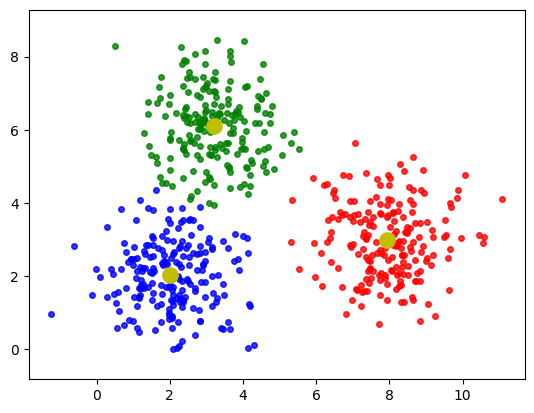

In [159]:
labels, centroids, iters = kmeans(X, K)

print("centroids: ", centroids)
kmeans_display(X, labels, centroids)

### Comments

Việc khởi tạo các centroid ban đầu một cách ngẫu nhiên đóng vai trò quan trọng trong hoạt động và hiệu quả của thuật toán K-means:

- Khởi động thuật toán một cách đơn giản và nhanh chóng
    $\rightarrow$ là một phương pháp khởi tạo rất đơn giản, không yêu cầu tính toán phức tạp hay bước tiền xử lý nào $\rightarrow$ nhanh và dễ triển khai khi làm việc với các tập dữ liệu lớn.

- Giảm biases 
    $\rightarrow$ việc lựa chọn các centroid theo một cách cố định hoặc có chủ đích từ trước có thể gây ra biases trong kết quả phân cụm $\rightarrow$ khởi tạo centroids ngẫu nhiên là hợp lý.

- Tăng tính tổng quát của thuật toán
    $\rightarrow$ do không phụ thuộc vào cấu trúc đặc thù của từng tập dữ liệu, khởi tạo ngẫu nhiên giúp K-means trở nên linh hoạt và có thể áp dụng cho nhiều loại dữ liệu khác nhau mà không cần điều chỉnh thủ công.

Tuy nhiên, điểm yếu của cách khởi tạo này là kết quả phân cụm có thể không ổn định – chạy cùng một thuật toán trên cùng một tập dữ liệu với các điểm khởi tạo khác nhau có thể cho ra các kết quả khác nhau. Vì lý do này, ta thường kết hợp khởi tạo ngẫu nhiên với việc chạy thuật toán nhiều lần và chọn kết quả có tổng sai số nhỏ nhất, hoặc sử dụng phương pháp như K-means++ để tăng độ ổn định và chất lượng phân cụm.

# Assignment 2

### Generate toy  dataset

In [160]:
N1_1 = 50
N1_2 = 20
N1_3 = 1000
X11 = np.random.multivariate_normal(means[0], cov, N1_1)
X12 = np.random.multivariate_normal(means[1], cov, N1_2)
X13 = np.random.multivariate_normal(means[2], cov, N1_3)

X1 = np.concatenate((X11, X12, X13), axis=0)
K = 3

original_labels = np.asarray([0] * N1_1 + [1] * N1_2 + [2] * N1_3).T

### Training

centroids:  [[4.43782672 5.50465287]
 [2.70875075 6.61657359]
 [2.28054763 4.28317342]]


C:\Users\ply58\AppData\Local\Temp\ipykernel_29092\3879156193.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(centroids[:, 0], centroids[:, 1], 'yo', color='y', markersize=10, mew=2, label='Centroids')


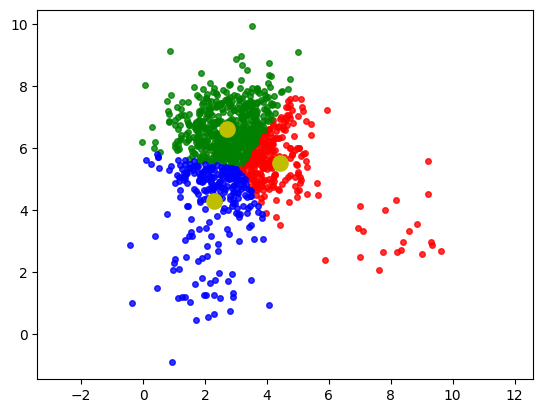

In [161]:
labels, centroids, iters = kmeans(X1, K)

print("centroids: ", centroids)
kmeans_display(X1, labels, centroids)

### Comments

Thuật toán K-means sẽ có xu hướng thiên lệch về cụm lớn hơn, điều này ảnh hưởng rõ rệt đến kết quả phân cụm:

- Cụm lớn chiếm ưu thế trong tính toán centroid
    K-means hoạt động dựa trên việc tối thiểu hóa tổng bình phương khoảng cách từ điểm dữ liệu đến centroid. Vì cụm lớn (với nhiều điểm) tạo ra sai số tổng thể lớn hơn nếu bị chia sai, thuật toán có xu hướng điều chỉnh các centroid sao cho cụm lớn được phân cụm tốt nhất. Kết quả là các cụm nhỏ có thể bị "gộp chung" hoặc đẩy vào vùng biên.

- Cụm nhỏ dễ bị bỏ sót hoặc phân loại sai
    Trong hình trên, cụm chứa 20 điểm (màu đỏ, gần tọa độ (8, 3)) rõ ràng bị ảnh hưởng: một phần bị tách rời ra hoặc bị gán sai nhãn. Điều này cho thấy K-means không xử lý tốt khi cụm nhỏ nằm gần cụm lớn – thuật toán có thể không "nhận ra" cụm nhỏ là một cụm riêng biệt.

- Tạo ranh giới không chính xác
    Sự không đồng đều về số lượng khiến ranh giới giữa các cụm bị đẩy lệch về phía cụm nhỏ. Điều này làm giảm độ chính xác tổng thể và cho thấy K-means không công bằng với tất cả các cụm.

- Thiếu khả năng mô hình hóa mật độ cụm
    K-means không xem xét đến mật độ phân bố dữ liệu, mà chỉ dựa vào khoảng cách trung bình. Do đó, các cụm có số lượng nhỏ nhưng phân bố chặt có thể bị coi là nhiễu hoặc gán nhầm sang cụm lớn hơn gần đó.


# Assignment 3

### Generate toy  dataset

In [162]:
N2_1 = 200
N2_2 = 200
N2_3 = 200
cov1 = [[1, 0], [0, 1]]
cov2 = [[10, 0], [0, 1]]
X21 = np.random.multivariate_normal(means[0], cov1, N2_1)
X22 = np.random.multivariate_normal(means[1], cov1, N2_2)
X23 = np.random.multivariate_normal(means[2], cov2, N2_3)

X2 = np.concatenate((X21, X22, X23), axis=0)
K = 3

original_labels = np.asarray([0] * N2_1 + [1] * N2_2 + [2] * N2_3).T

### Training

centroids:  [[1.71219391 6.03536253]
 [7.8666609  3.4148568 ]
 [1.88804388 1.98075379]]


C:\Users\ply58\AppData\Local\Temp\ipykernel_29092\3879156193.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(centroids[:, 0], centroids[:, 1], 'yo', color='y', markersize=10, mew=2, label='Centroids')


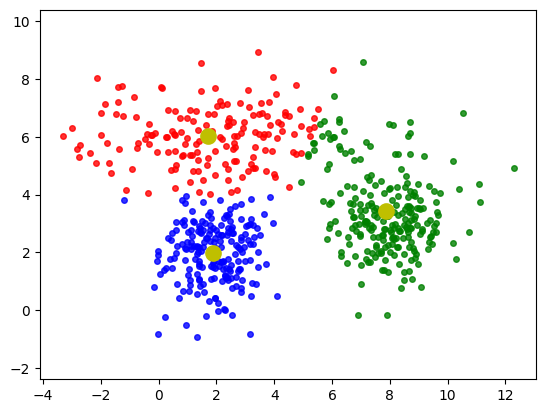

In [163]:
labels, centroids, iters = kmeans(X2, K)

print("centroids: ", centroids)
kmeans_display(X2, labels, centroids)